Explorando os indicadores mais bem ranqueados pra diferentes ações

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
# Carregando dataset
df_resultado_junto = pd.read_csv("resultado_junto.csv")

# Explorando primeiras linhas
df_resultado_junto.head(5)

,Stock,Features,Volatility,Percent Return,Win Rate,Accuracy Test,Total Dict,Selected Features,binarized
0,AZUL4.SA,3,0.753509,4.300100,40.909091,0.332,"{'-1.0': {'precision': 0.5, 'recall': 0.102040...","['n_estimators', 'mass_window_fast', 'mass_win...",1
1,AZUL4.SA,4,0.753509,0.140706,41.666667,0.320,"{'-1.0': {'precision': 0.4482758620689655, 're...","['n_estimators', 'mass_window_fast', 'mass_win...",1
2,AZUL4.SA,5,0.753509,-8.540786,36.363636,0.304,"{'-1.0': {'precision': 0.4090909090909091, 're...","['n_estimators', 'adx_period', 'atr_period', '...",1
3,AZUL4.SA,6,0.753509,9.636100,45.833333,0.344,"{'-1.0': {'precision': 0.5, 'recall': 0.071428...","['n_estimators', 'adx_period', 'atr_period', '...",1
4,AZUL4.SA,7,0.753509,-21.173700,33.333333,0.284,"{'-1.0': {'precision': 0.5714285714285714, 're...","['n_estimators', 'adx_period', 'atr_period', '...",1


In [17]:
def transforma_string_em_lista(string):
    return ast.literal_eval(string)

## Frequência de cada indicador

In [57]:
# Reduzindo colunas
colunas_selecionadas = [
    "Selected Features",
    "Stock",
    "Percent Return"
]
renomea_colunas = {
    "Selected Features": "sf",
    "Stock": "st",
    "Percent Return": "pr",
}


df_reduzido = df_resultado_junto[colunas_selecionadas]
# Renomeando colunas
df_renomeado = df_reduzido.rename(columns=renomea_colunas)
# Transformando strings em listas
df_renomeado["sf"] = df_renomeado["sf"].apply(ast.literal_eval)
# Expandindo dataset colocando os indicadores em múltiplas linhas
df_expandido = df_renomeado.explode("sf")
# Retirando n_estimators
df_expandido = df_expandido[df_expandido['sf'] != "n_estimators"]

display(df_expandido.head(5))

# Mantendo apenas indicador e tirando hiperparâmetros
df_expandido['prefixo'] = df_expandido['sf'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Step 2: Keep the first occurrence of each prefixo
df_expandido['primeira_versao'] = df_expandido.groupby('prefixo')['sf'].transform('first')

# Step 3: Replace all occurrences with the prefixo, keeping the first version
df_expandido['sf'] = df_expandido['primeira_versao']

# Step 4: Drop temporary columns
df_expandido = df_expandido.drop(columns=['prefixo', 'primeira_versao'])

df_expandido.head(5)

,sf,st,pr
0,mass_window_fast,AZUL4.SA,4.300100
0,mass_window_slow,AZUL4.SA,4.300100
0,dpo_window,AZUL4.SA,4.300100
1,mass_window_fast,AZUL4.SA,0.140706
1,mass_window_slow,AZUL4.SA,0.140706


,sf,st,pr
0,mass_window_fast,AZUL4.SA,4.300100
0,mass_window_fast,AZUL4.SA,4.300100
0,dpo_window,AZUL4.SA,4.300100
1,mass_window_fast,AZUL4.SA,0.140706
1,mass_window_fast,AZUL4.SA,0.140706


C:\Users\danie\AppData\Local\Temp\ipykernel_3324\2990570620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_indicadores.index, y=contagem_indicadores.values, palette='viridis')


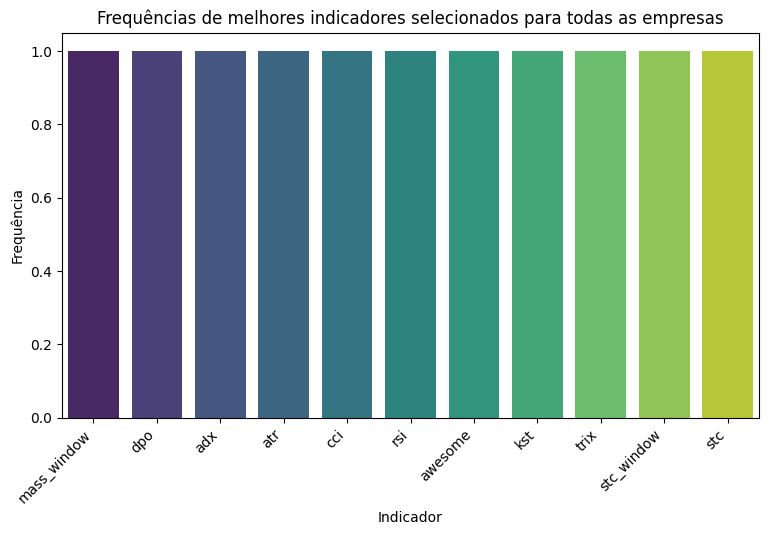

In [46]:
# TODO: remover indidcadores parecidos ou não antes de usar

# Contando indicadores utilizados
contagem_indicadores = df_expandido_unico["sf"].value_counts()

# Criando gráfico de frequências de indicaodres utilizados
plt.figure(figsize=(9, 5))
sns.barplot(x=contagem_indicadores.index, y=contagem_indicadores.values, palette='viridis')
plt.title("Frequências de melhores indicadores selecionados para todas as empresas")
plt.xlabel("Indicador")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.show()

## Comparação de performance

C:\Users\danie\AppData\Local\Temp\ipykernel_3324\1279006157.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_retorno', y='sf', data=performance_indicador_ordenado, palette='coolwarm')


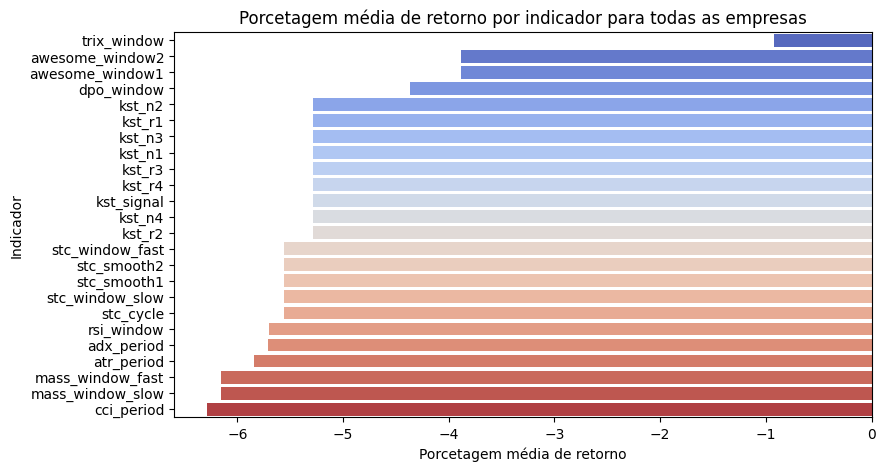

In [38]:
# Juntando a porcentagem de retorno de cada ação com os indicaodres
# correspondentes
df_mesclado = df_expandido[["sf", "pr"]]

# Calculando média e desvio padrão do retorno pra caad indicador
performance_indicador = df_mesclado.groupby("sf").agg(
    media_retorno=("pr", "mean"),
    desvio_retorno=("pr", "std")
).reset_index()

# Ordenando pelo retorno médio para identificar os que performaram melhor
performance_indicador_ordenado = performance_indicador.sort_values(by='media_retorno', ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(x='media_retorno', y='sf', data=performance_indicador_ordenado, palette='coolwarm')
plt.title("Porcetagem média de retorno por indicador para todas as empresas")
plt.xlabel("Porcetagem média de retorno")
plt.ylabel("Indicador")
plt.show()